# Calcolo delle extended pareto grid
Lavoriamo sul toro piatto $T=[0,2\pi]\times[0,2\pi]/(x,0)=(x,2\pi),(0,y)=(2\pi,y)$, pertanto lavoriamo con funzioni $\mathbb{R}^2\rightarrow \mathbb{R}^2$ periodiche in entrambe le variabili.

Per il momento abbiamo fatto degli esempi con funzioni polinomiali in seno e coseno (per esempio del tipo $(f_1(x,y),f_2(x,y))=(a\ cos(x)^2+b\ cos(y)\ ,\ c\ sin(x)^3+d\ sin(y)^2)$).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
import numdifftools as nd

### Setting:
##### Costruiamo una griglia di punti sul toro, tutte le funzioni veranno valutate su questi. Questa può essere raffinata a piacimento e al momento contiene 10.000 punti.

##### Chiaramente alcuni punti importanti potrebbero essere esclusi, ma ammettendo una certa tolleranza siamo riusciti ad ottenere un risultato abbastanza buono.

Un diverso approccio, quello che abbiamo provato all'inizio, potrebbe essere quello di non creare la griglia e trattare le nostre funzioni con metodi della libreria numdifftools (per esempio per trovare gli zeri dei gradienti); il problema è che questi metodi sono molto costosi e non si adattano nemmeno troppo bene.

In [2]:
#griglia sul toro su cui facciamo i conti

eps=2*np.pi/100
x=[]
for i in np.arange(0,2*np.pi+eps,eps):
    for j in np.arange(0,2*np.pi+eps,eps):
        x.append([i,j])
x=np.array(x)
l=len(x)

### Calcolo punti Pareto Critici
Un punto $(x,y)\in T$ è detto Pareto Critico se $\exists \lambda\le 0$ t.c. $\nabla f_1(x,y)=\lambda\nabla f_2(x,y)$.

Questa condizione equivale a richiedere che:

se $\nabla f_1(x,y)=(a_0,a_1),\ \nabla f_2(x,y)=(b_0,b_1)$, allora $a_0=\lambda b_0$ e $a_1=\lambda b_1$, quindi $\frac{a_0}{b_0}=\lambda=\frac{a_1}{b_1}$ dove queste sono ben definite.

Pertanto valuto questi rapporti, ammettendo una certa tolleranza, e tratto da parte i casi in cui questo non è ben definito.

Dall'articolo: assumiamo per ipotesi che siano finiti e disgiunti l'insieme dei punti critici di $f_1$ e l'insieme dei punti critici di $f_2$, ma in realtà nei due esempi sotto la condizione non è soddisfatta.

Note: al momento per calcolare i gradienti utilizziamo un metodo della libreria numdifftools ([documentazione](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html#numpy-gradient)); Eloy si sta occupando di creare una classe .py specifica che tratti in modo efficiente le funzioni polinomiali che stiamo considerando. In linea di principio, al momento, il nostro programma può trattare qualsiasi tipo di funzione sul toro.

In [3]:
def Pareto(f_1,f_2,tol):
    #per ora uso una sola toleranza, come se fosse il mio zero
    cr1=[]  #lista dei punti critici di f_1
    cr2=[]  #lista dei punti critici di f_2
    ppc=[]  #lista dei punti Pareto Critici
    for i in range (0,l,1):
        a=nd.Gradient(f_1)(x[i])
        b=nd.Gradient(f_2)(x[i])
        if a[0]==0 and a[1]==0:       #se ho un punto critico per f_1 la condizione è verificata per qualunque valore del gradiente di f_2
            cr1.append(x[i])
            ppc.append(x[i])
        if b[0]==0 and b[1]==0:     #se ho un punto critico per f_2 la condizione è verificata per qualunque valore del gradiente di f_1
            cr2.append(x[i])
            ppc.append(x[i])
        if a[0]==0 and a[1]!=0:     
            if abs(b[0])<=tol and b[1]/a[1]<=tol:
                ppc.append(x[i])
        if a[1]==0 and a[0]!=0:
            if abs(b[1])<=tol and b[0]/a[0]<=tol:
                ppc.append(x[i])
        if b[0]==0 and b[1]!=0:
            if abs(a[0])<=tol and a[1]/b[1]<=tol:
                ppc.append(x[i])
        if b[1]==0 and b[0]!=0:
            if abs(a[1])<=tol and a[0]/b[0]<=tol:
                ppc.append(x[i])
        if b[0]!=0 and b[1]!=0:
             if abs(a[0]/b[0]-a[1]/b[1])<=tol and (a[0]/b[0]<=tol or a[1]/b[1]<=tol):
                 ppc.append(x[i])
    ppc=np.array(ppc)
    cr1=np.array(cr1)
    cr2=np.array(cr2)
    return ppc,cr1,cr2

In [5]:
#prova di funzione a caso:

def e1(x):
    return np.exp(np.cos(x[0])**2)
def e2(x):
    return np.sin(x[1])

pareto0,cr1,cr2=Pareto(e1,e2,0)
pareto05,cr1,cr2=Pareto(e1,e2,0.5)

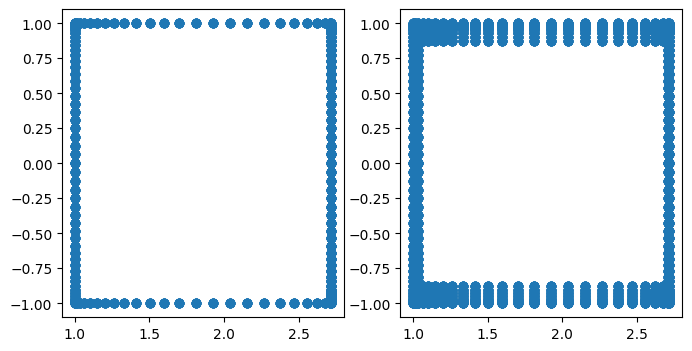

In [8]:
fig,axes=plt.subplots(1,2)
fig.set_size_inches(8,4)
axes[0].scatter([e1(p) for p in pareto0],[e2(p) for p in pareto0])
axes[1].scatter([e1(p) for p in pareto05],[e2(p) for p in pareto05])

# Primo Esempio:

$f=(f_1,f_2)$ con $f_1(x,y)=cos\ x\ \ \ ,\ f_2(x,y)=cos\ y$

$\nabla f_1(x,y)=(sen\ x,0)\ ,\ \nabla f_2(x,y)=(0,sen\ y)$

###### Nota: in questo esempio i punti critici sono infiniti

In [ ]:
def f_1(x):
    return np.cos(x[0])

def f_2(x):
    return np.cos(x[1])

In [ ]:
# applichiamo la funzione creata sopra per ottenere i punti critici e i punti pareto critici

Pareto0,cr1,cr2=Pareto(f_1,f_2,0)

### Calcolo i punti critici:
Questa parte non è necessaria, ma l'ho inserita per due motivi:

1. facciamo un primo controllo per vedere se ha senso quello che stiamo facento
2. sappiamo che i valori critici sono gli estremi degli archi della EPG, quindi faccio un primo plot per avere un'idea di come è disposta nel piano l'EPG

In [ ]:
plt.scatter([f_1(c) for c in cr1],[f_2(c) for c in cr1],color='red',s=0.3,label='f_1')
plt.scatter([f_1(c) for c in cr2],[f_2(c) for c in cr2],color='blue',s=0.3,label='f_2')
plt.legend(loc="center")
plt.title('Immagini dei Punti Critici - Tolleranza=0')

### Cosa mi aspetto:
Per la funzione $f(x,y)=(cos\ x,cos\ y)$, con tolleranza 0, come punti Pareto Critici dovrebbero venire fuori tutti e soli i punti critici di $f_1$ e $f_2$.

In [ ]:
plt.scatter([f_1(p) for p in Pareto0],[f_2(p) for p in Pareto0])
plt.title('Extended Pareto Grid di f - Tolleranza=0')

In [ ]:
# plt.scatter([p[0] for p in Pareto0],[p[1] for p in Pareto0])
# plt.title('Punti Pareto Critici di f - Tolleranza=0')

Questo esempio era estremamente banale, quindi il risultato coincide con le aspettative; non faccio altre prove di tolleranza

# Secondo Esempio:
$g_1(x,y)=2 cos^2\ x+4\ cos\ y\ \ \ ,\ g_2(x,y)=sin^3\ x+3\ sin^2\ y$

$\nabla g_1=(-4 cos\ x\ sen\ x,\ -4 sen\ y),\ \nabla g_2=(3 cos\ x\ sen^2\ x,6 cos\ y \ sen\ y)$

###### Nota: gli insiemi dei punti critici di $f_1$ e $f_2$ non sono disgiunti

In [ ]:
def g_1(x):
    return 2*np.cos(x[0])**2+4*np.cos(x[1])

def g_2(x):
    return 1*np.sin(x[0])**3+3*np.sin(x[1])**2

In [ ]:
pareto0,gcr1,gcr2=Pareto(g_1,g_2,0)

In [ ]:
plt.scatter([g_1(c) for c in gcr1],[g_2(c) for c in gcr1],color='red',s=0.8,label='g_1')
plt.scatter([g_1(c) for c in gcr2],[g_2(c) for c in gcr2],color='blue',s=0.8,label='g_2')
plt.legend(loc="upper left")
plt.title('Immagini dei Punti Critici - Tolleranza=0')

In [ ]:
plt.scatter([g_1(p) for p in pareto0],[g_2(p) for p in pareto0],s=0.1)
plt.title('Extended Pareto Grid di g - Tolleranza=0')

#Testing:
doc = open("list_crit_points.txt","w")
doc.write("CR1:" + '\n')
for crit in gcr1:
    doc.write(str(g_1(crit)) + ' ' + str(g_2(crit))+'\n')
#doc.write("CR2:" + '\n')
# for crit in cr2:
#     doc.write(str(crit)+'\n')
doc.close

Osservazione: facendo i conti a mano, mi risulta che la EPG di $g$ sia 
$\{ (2 cos^2\ x+2 sen\ x,\ 8 cos^3\ y+3 sen^2\ y)\ |\ x\in [\pi,2\pi],\ y\in [\frac{\pi}{2},\frac{3\pi}{2}]\}\cup \{4*cos\}$. .........

Pertanto non mi torna questa EPG: per esempio dovrebbe contenere il punto $(2,-8)$, conti fatti con geogebra.

In [ ]:
plt.scatter([p[0] for p in pareto0],[p[1] for p in pareto0],s=0.1)
plt.title('Punti Pareto Critici di g - Tolleranza=0')


Provo ad aumentare la tolleranza.

In [ ]:
pareto01,gcr1,gcr2=Pareto(g_1,g_2,1)

In [ ]:
plt.scatter([g_1(c) for c in gcr1],[g_2(c) for c in gcr1],color='red',s=0.8,label='g_1')
plt.scatter([g_1(c) for c in gcr2],[g_2(c) for c in gcr2],color='blue',s=0.8,label='g_2')
plt.legend(loc="upper left")
plt.title('Punti Critici - Tolleranza=0.01')

In [ ]:
plt.scatter([g_1(p) for p in pareto01],[g_2(p) for p in pareto01],s=0.1)
plt.title('Extended Pareto Grid di g - Tolleranza=1')

Osservazione: non cambia assolutamente niente :(

In [ ]:
plt.scatter([p[0] for p in pareto01],[p[1] for p in pareto01],s=0.1)
plt.title('Punti Pareto Critici di g - Tolleranza=0.01')

Adosso provo a plottare quanto emerge dai conti

In [ ]:
def h1(x):
    return 2*np.cos(x[0])**2+2*np.sin(x[0])
def h2(x):
    return 8*np.cos(x[1])**3+3*np.sin(x[1])**2
def p1(x):
    return 4*np.cos(x)
def p2(x):
    return 2*4*np.cos(x)
def q1(x):
    return 1+3*np.sin(x)**2
def q2(x):
    return 3*np.sin(x)**2-1
def q3(x):
    return 3*np.sin(x)**2
def pp1(x):
    return 4+2*np.cos(x)**2
def pp2(x):
    return 2*np.cos(x)**2-4
def q(x):
    return np.sin(x)**3

x=np.linspace(0,np.pi,100)
y=np.concatenate([np.linspace(0,np.pi/2,50),np.linspace(3*np.pi/2,2*np.pi,50)])
punti=[]

for i in range(0,len(x),1):
    for j in range(0,len(x),1):
        punti.append([x[i],y[j]])

punti=np.array(punti)

plt.figure(figsize=(5,5))
plt.scatter([g_1(c) for c in gcr1],[g_2(c) for c in gcr1],s=0.8,color='red')
plt.scatter([g_1(c) for c in gcr2],[g_2(c) for c in gcr2],s=0.8,color='red')
plt.scatter([h1(i) for i in punti],[h2(i) for i in punti],s=0.8,color='blue')
plt.scatter([p1(i) for i in x],[q1(i) for i in y],s=0.8,color='yellow')
plt.scatter([p1(i) for i in x],[q2(i) for i in y],s=0.8,color='green')
plt.scatter([p2(i) for i in x],[q3(i) for i in y],s=0.8,color='black')
plt.scatter([pp1(i) for i in x],[q(i) for i in y],s=0.8,color='orange')
plt.scatter([pp2(i) for i in x],[q(i) for i in y],s=0.8,color='grey')


plt.title('Extended Pareto Grid - calcolata a mano')